In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.concat(map(pd.read_csv, glob.glob('data/*.csv'))) 

/var/folders/d5/8v_11v3x59q63gqgs8qxv2w00000gn/T/ipykernel_69124/1194864378.py:1: DtypeWarning: Columns (18,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(pd.read_csv, glob.glob('data/*.csv')))
/var/folders/d5/8v_11v3x59q63gqgs8qxv2w00000gn/T/ipykernel_69124/1194864378.py:1: DtypeWarning: Columns (18,21,22,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(pd.read_csv, glob.glob('data/*.csv')))
/var/folders/d5/8v_11v3x59q63gqgs8qxv2w00000gn/T/ipykernel_69124/1194864378.py:1: DtypeWarning: Columns (18,21,22,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(pd.read_csv, glob.glob('data/*.csv')))
/var/folders/d5/8v_11v3x59q63gqgs8qxv2w00000gn/T/ipykernel_69124/1194864378.py:1: DtypeWarning: Columns (18,21,22,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(pd.read_csv, glob.glob

/var/folders/d5/8v_11v3x59q63gqgs8qxv2w00000gn/T/ipykernel_69124/1194864378.py:1: DtypeWarning: Columns (18,21,22,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(pd.read_csv, glob.glob('data/*.csv')))
/var/folders/d5/8v_11v3x59q63gqgs8qxv2w00000gn/T/ipykernel_69124/1194864378.py:1: DtypeWarning: Columns (18,21,22,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(pd.read_csv, glob.glob('data/*.csv')))
/var/folders/d5/8v_11v3x59q63gqgs8qxv2w00000gn/T/ipykernel_69124/1194864378.py:1: DtypeWarning: Columns (18,21,22,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(pd.read_csv, glob.glob('data/*.csv')))


In [3]:
# #salinam reiksmes nes negalim pakeisti medianom ar vidurkiais ir recepto ID, nes visada bus unikalus
# df = df.drop(columns=['dirbt_recepto_id', 'vaisto_prek_pav', 'mpp_aprasymas', 'vart_budas_id', 'vart_budas_pav', 'vien_doze', 
#                       'vien_doze_vnt_id', 'vien_doze_vnt_pav', 'vart_daznumas', 'vart_laikas',
#                       'gydymui_testi_periodas_d'])

# #pasalinam besidublikuojancius stulpelius(id ir pav)
# df = df.drop(columns=['ligos_kodas', 'vaisto_farmac_forma_id', 'atc_kodas', 'vaisto_farmac_forma_id',
#                       'dozuociu_sk_vnt_id', 'vaisto_narkot_poz_id'])

# #pasalinam metus, nes duomenys is tu paciu metu
# df = df.drop(columns='recepto_metai')

# #pasalinam eilutes kuriuose yra Neatveriama reiksme
# df = df[df.vaisto_tipas != 'Neatveriama']

# #spejam kad jei organizacijos savivaldybe yra NaN, todel kad sutampa su paciento ir vice versa
# df.org_savivaldybe.fillna(df.pac_savivaldybe, inplace=True)
# df.pac_savivaldybe.fillna(df.org_savivaldybe, inplace=True)

# #pakeiciam NaN reiksmes i ne-narkotikas
# df['vaisto_narkot_poz_pav'] = df['vaisto_narkot_poz_pav'].fillna('ne-narkotikas')

# #pakeiciam vaisto stipruma i int
# df = df.assign(vaisto_stiprumas = lambda x: x['vaisto_stiprumas'].str.extract('(\d+)'))
# df.vaisto_stiprumas = pd.to_numeric(df.vaisto_stiprumas)
                                    
# # df = df.groupby('ligos_pav').filter(lambda x : len(x)>100)
# # df = df.groupby('vaisto_farmac_forma_pav').filter(lambda x : len(x)>10)
# # df = df.groupby('gyd_kvalifikacijos_galioja').filter(lambda x : len(x)>5)

# df = df[df.recepto_statusas != 'active']
# df = df[df.recepto_statusas != 'on hold']
                                    
# df = df.dropna()

In [4]:
df.head()

,dirbt_recepto_id,recepto_metai,recepto_ketv,ligos_kodas,ligos_pav,vaisto_tipas,vaisto_bendr_pav,vaisto_prek_pav,atc_kodas,atc_pav,...,kompens_poz,vaisto_narkot_poz_id,vaisto_narkot_poz_pav,recepto_statusas,org_savivaldybe,gyd_kvalifikacijos_galioja,pac_lytis,pac_amziaus_gr,pac_savivaldybe,Unnamed: 0
0,4.953042e+16,2022.0,1,J06.9,"Ūminė viršutinių kvėpavimo takų infekcija, nep...",Vaistas,Amoksicilinas,NaN,J01CA04,Amoxicillin,...,0,NaN,NaN,completed,Kretingos r. sav.,Šeimos gydytojas,M,Iki 17 m.,Kretingos r. sav.,NaN
1,4.951343e+16,2022.0,1,H11.9,"Junginės ligos, nepatikslintos",Vaistas,Deksametazonas,NaN,S01BA01,Dexamethasone,...,0,NaN,NaN,completed,Neatveriama,Medicinos gydytojas,V,18-44 m.,Vilniaus m. sav.,NaN
2,4.952601e+16,2022.0,1,F41.2,Mišrus nerimo ir depresinis sutrikimas,Vaistas,Bromazepamas,NaN,N05BA08,Bromazepam,...,0,18537.0,Psichotropas,completed,Ukmergės r. sav.,Gydytojas psichiatras,M,Nuo 65 m.,Ukmergės r. sav.,NaN
3,4.952190e+16,2022.0,1,I11.9,Hipertenzinė širdies liga be širdies nepakanka...,Vaistas,Bizoprololis/Amlodipinas,NaN,C07FB07,Bisoprolol and amlodipine,...,1,NaN,NaN,completed,Kauno m. sav.,Gydytojas kardiologas,M,45-64 m.,Kauno m. sav.,NaN
4,4.952756e+16,2022.0,1,I20.8,Kitos krūtinės anginos formos,Vaistas,Izosorbido mononitratas,NaN,C01DA14,Isosorbide mononitrate,...,1,NaN,NaN,completed,Palangos m. sav.,Šeimos gydytojas,V,Nuo 65 m.,Palangos m. sav.,NaN


In [5]:
df.info()
                           

<class 'pandas.core.frame.DataFrame'>
Index: 34776608 entries, 0 to 498344
Data columns (total 37 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   dirbt_recepto_id            float64
 1   recepto_metai               float64
 2   recepto_ketv                int64  
 3   ligos_kodas                 object 
 4   ligos_pav                   object 
 5   vaisto_tipas                object 
 6   vaisto_bendr_pav            object 
 7   vaisto_prek_pav             object 
 8   atc_kodas                   object 
 9   atc_pav                     object 
 10  vaisto_farmac_forma_id      float64
 11  vaisto_farmac_forma_pav     object 
 12  vaisto_stiprumas            object 
 13  mpp_aprasymas               object 
 14  dozuociu_sk                 int64  
 15  dozuociu_sk_vnt_id          float64
 16  dozuociu_sk_vnt_pav         object 
 17  vart_budas_id               float64
 18  vart_budas_pav              object 
 19  vien_doze                 

In [6]:
df.describe(include='all')

,dirbt_recepto_id,recepto_metai,recepto_ketv,ligos_kodas,ligos_pav,vaisto_tipas,vaisto_bendr_pav,vaisto_prek_pav,atc_kodas,atc_pav,...,kompens_poz,vaisto_narkot_poz_id,vaisto_narkot_poz_pav,recepto_statusas,org_savivaldybe,gyd_kvalifikacijos_galioja,pac_lytis,pac_amziaus_gr,pac_savivaldybe,Unnamed: 0
count,1.839070e+07,18390699.0,3.477661e+07,18390699,34776608,18390699,34756138,445132,17622611,17622611,...,3.477661e+07,1.674853e+06,1674853,34776608,1959366,34297262,34683029,34683029,33787795,1.638591e+07
unique,NaN,NaN,NaN,10016,9975,5,2805,3767,1205,1117,...,NaN,NaN,5,5,61,149,3,5,61,NaN
top,NaN,NaN,NaN,I11.9,Hipertenzinė širdies liga be širdies nepakanka...,Vaistas,Metoprololio sukcinatas,Neatveriama,C07AB02,Metoprolol,...,NaN,NaN,Psichotropas,completed,Vilniaus m. sav.,Šeimos gydytojas,M,Nuo 65 m.,Vilniaus m. sav.,NaN
freq,NaN,NaN,NaN,4114795,8019652,17607363,945525,51594,511902,511902,...,NaN,NaN,1361671,30716076,443526,19865496,21847151,18446166,6766416,NaN
mean,4.476508e+16,2022.0,2.511254e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.880518e-01,1.801419e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.603379e+05
std,1.343412e+16,0.0,1.141781e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.951909e-01,3.221115e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.562530e+05
min,4.942772e+07,2022.0,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.000000e+00,-1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,4.902913e+16,2022.0,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,1.853700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.273150e+05
50%,4.920889e+16,2022.0,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,1.853700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.546300e+05
75%,4.936817e+16,2022.0,4.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,1.853700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.842790e+05


In [7]:
df.isnull().sum()

dirbt_recepto_id              16385909
recepto_metai                 16385909
recepto_ketv                         0
ligos_kodas                   16385909
ligos_pav                            0
vaisto_tipas                  16385909
vaisto_bendr_pav                 20470
vaisto_prek_pav               34331476
atc_kodas                     17153997
atc_pav                       17153997
vaisto_farmac_forma_id        17092703
vaisto_farmac_forma_pav         706796
vaisto_stiprumas              17103544
mpp_aprasymas                 34504968
dozuociu_sk                          0
dozuociu_sk_vnt_id                  11
dozuociu_sk_vnt_pav                 11
vart_budas_id                 34725009
vart_budas_pav                34725009
vien_doze                     34725010
vien_doze_vnt_id              34725010
vien_doze_vnt_pav             34725010
vart_daznumas                 34725009
vart_laikas                   34725009
vart_trukme_d                        0
gydymui_testi_periodas_d 

In [8]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))
        
initial_eda(df)

Dimensions : 34776608 rows, 37 columns
Total NA Values : 600198515 
                           Column Name  Data Type      #Distinct  NA Values
                      dirbt_recepto_id    float64     18390699   16385909
                         recepto_metai    float64            1   16385909
                          recepto_ketv      int64            4          0
                           ligos_kodas     object        10016   16385909
                             ligos_pav     object         9975          0
                          vaisto_tipas     object            5   16385909
                      vaisto_bendr_pav     object         2805      20470
                       vaisto_prek_pav     object         3767   34331476
                             atc_kodas     object         1205   17153997
                               atc_pav     object         1117   17153997
                vaisto_farmac_forma_id    float64          369   17092703
               vaisto_farmac_forma_pav    

In [9]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)


There are 22 categorical variables

The categorical variables are :

 ['ligos_kodas', 'ligos_pav', 'vaisto_tipas', 'vaisto_bendr_pav', 'vaisto_prek_pav', 'atc_kodas', 'atc_pav', 'vaisto_farmac_forma_pav', 'vaisto_stiprumas', 'mpp_aprasymas', 'dozuociu_sk_vnt_pav', 'vart_budas_pav', 'vien_doze_vnt_pav', 'vart_daznumas', 'vart_laikas', 'vaisto_narkot_poz_pav', 'recepto_statusas', 'org_savivaldybe', 'gyd_kvalifikacijos_galioja', 'pac_lytis', 'pac_amziaus_gr', 'pac_savivaldybe']


In [10]:
df[categorical].head()

,ligos_kodas,ligos_pav,vaisto_tipas,vaisto_bendr_pav,vaisto_prek_pav,atc_kodas,atc_pav,vaisto_farmac_forma_pav,vaisto_stiprumas,mpp_aprasymas,...,vien_doze_vnt_pav,vart_daznumas,vart_laikas,vaisto_narkot_poz_pav,recepto_statusas,org_savivaldybe,gyd_kvalifikacijos_galioja,pac_lytis,pac_amziaus_gr,pac_savivaldybe
0,J06.9,"Ūminė viršutinių kvėpavimo takų infekcija, nep...",Vaistas,Amoksicilinas,NaN,J01CA04,Amoxicillin,disperguojamosios tabletės,500 mg,NaN,...,NaN,NaN,NaN,NaN,completed,Kretingos r. sav.,Šeimos gydytojas,M,Iki 17 m.,Kretingos r. sav.
1,H11.9,"Junginės ligos, nepatikslintos",Vaistas,Deksametazonas,NaN,S01BA01,Dexamethasone,akių lašai (suspensija),1 mg/ml,NaN,...,NaN,NaN,NaN,NaN,completed,Neatveriama,Medicinos gydytojas,V,18-44 m.,Vilniaus m. sav.
2,F41.2,Mišrus nerimo ir depresinis sutrikimas,Vaistas,Bromazepamas,NaN,N05BA08,Bromazepam,tabletės,3 mg,NaN,...,NaN,NaN,NaN,Psichotropas,completed,Ukmergės r. sav.,Gydytojas psichiatras,M,Nuo 65 m.,Ukmergės r. sav.
3,I11.9,Hipertenzinė širdies liga be širdies nepakanka...,Vaistas,Bizoprololis/Amlodipinas,NaN,C07FB07,Bisoprolol and amlodipine,tabletės,5 mg/5 mg,NaN,...,NaN,NaN,NaN,NaN,completed,Kauno m. sav.,Gydytojas kardiologas,M,45-64 m.,Kauno m. sav.
4,I20.8,Kitos krūtinės anginos formos,Vaistas,Izosorbido mononitratas,NaN,C01DA14,Isosorbide mononitrate,tabletės,20 mg,NaN,...,NaN,NaN,NaN,NaN,completed,Palangos m. sav.,Šeimos gydytojas,V,Nuo 65 m.,Palangos m. sav.


In [11]:
for var in categorical: 
    
    print(df[var].value_counts())


ligos_kodas
I11.9     4114795
I11.0      522490
E11.9      365291
Z71.8      342007
I20.8      328697
           ...   
M11.96          1
M46.92          1
Q60.3           1
H18.0           1
Q73.1           1
Name: count, Length: 10016, dtype: int64
ligos_pav
Hipertenzinė širdies liga be širdies nepakankamumo (stazinio)                              8019652
Hipertenzinė širdies liga su širdies nepakankamumu (staziniu)                              1002096
Kitas patikslintas konsultavimas                                                            642991
Kitos krūtinės anginos formos                                                               635461
Pasikartojantis depresinis sutrikimas, vidutinio sunkumo depresijos epizodas                635125
                                                                                            ...   
Kita sausgyslės (makšties) kontraktūra, dubens sritis ir šlaunis                                 1
Kitų nervų sužalojimai klubo ir šlaunies lygyj

vart_budas_pav
Neatveriama          51594
vartoti per burną        5
Name: count, dtype: int64
vien_doze_vnt_pav
Neatveriama    51594
kapsulė            2
tabletė            2
Name: count, dtype: int64
vart_daznumas
Neatveriama    51594
2 k./1 d.          3
1 k./1 d.          2
Name: count, dtype: int64
vart_laikas
Neatveriama                51594
Ryte, Vakare                   2
Ryte                           1
Po valgio, Ryte, Vakare        1
Vakare                         1
Name: count, dtype: int64
vaisto_narkot_poz_pav
Psichotropas                            1361671
Narkotikas                               198842
Kompensuojamas tik tęstiniam gydymui      62713
Neatveriama                               51594
Prekursorius                                 33
Name: count, dtype: int64
recepto_statusas
completed      30716076
stopped         3884954
active           117687
Neatveriama       51594
on hold            6297
Name: count, dtype: int64
org_savivaldybe
Vilniaus m. sav.     4435

In [12]:
for var in categorical:
    
     print(round(df[var].value_counts()/np.float32(len(df)), 6))

ligos_kodas
I11.9     0.118321
I11.0     0.015024
E11.9     0.010504
Z71.8     0.009834
I20.8     0.009452
            ...   
M11.96    0.000000
M46.92    0.000000
Q60.3     0.000000
H18.0     0.000000
Q73.1     0.000000
Name: count, Length: 10016, dtype: float64
ligos_pav
Hipertenzinė širdies liga be širdies nepakankamumo (stazinio)                              0.230605
Hipertenzinė širdies liga su širdies nepakankamumu (staziniu)                              0.028815
Kitas patikslintas konsultavimas                                                           0.018489
Kitos krūtinės anginos formos                                                              0.018273
Pasikartojantis depresinis sutrikimas, vidutinio sunkumo depresijos epizodas               0.018263
                                                                                             ...   
Kita sausgyslės (makšties) kontraktūra, dubens sritis ir šlaunis                           0.000000
Kitų nervų sužalojimai klu

vien_doze_vnt_pav
Neatveriama    0.001484
kapsulė        0.000000
tabletė        0.000000
Name: count, dtype: float64
vart_daznumas
Neatveriama    0.001484
2 k./1 d.      0.000000
1 k./1 d.      0.000000
Name: count, dtype: float64
vart_laikas
Neatveriama                0.001484
Ryte, Vakare               0.000000
Ryte                       0.000000
Po valgio, Ryte, Vakare    0.000000
Vakare                     0.000000
Name: count, dtype: float64
vaisto_narkot_poz_pav
Psichotropas                            0.039155
Narkotikas                              0.005718
Kompensuojamas tik tęstiniam gydymui    0.001803
Neatveriama                             0.001484
Prekursorius                            0.000001
Name: count, dtype: float64
recepto_statusas
completed      0.883240
stopped        0.111712
active         0.003384
Neatveriama    0.001484
on hold        0.000181
Name: count, dtype: float64
org_savivaldybe
Vilniaus m. sav.     0.012754
Kauno m. sav.        0.007645
Klaipėdos m.

In [13]:
df['recepto_statusas'].value_counts()

recepto_statusas
completed      30716076
stopped         3884954
active           117687
Neatveriama       51594
on hold            6297
Name: count, dtype: int64

In [14]:
df['recepto_statusas'].value_counts()/len(df)

recepto_statusas
completed      0.883240
stopped        0.111712
active         0.003384
Neatveriama    0.001484
on hold        0.000181
Name: count, dtype: float64

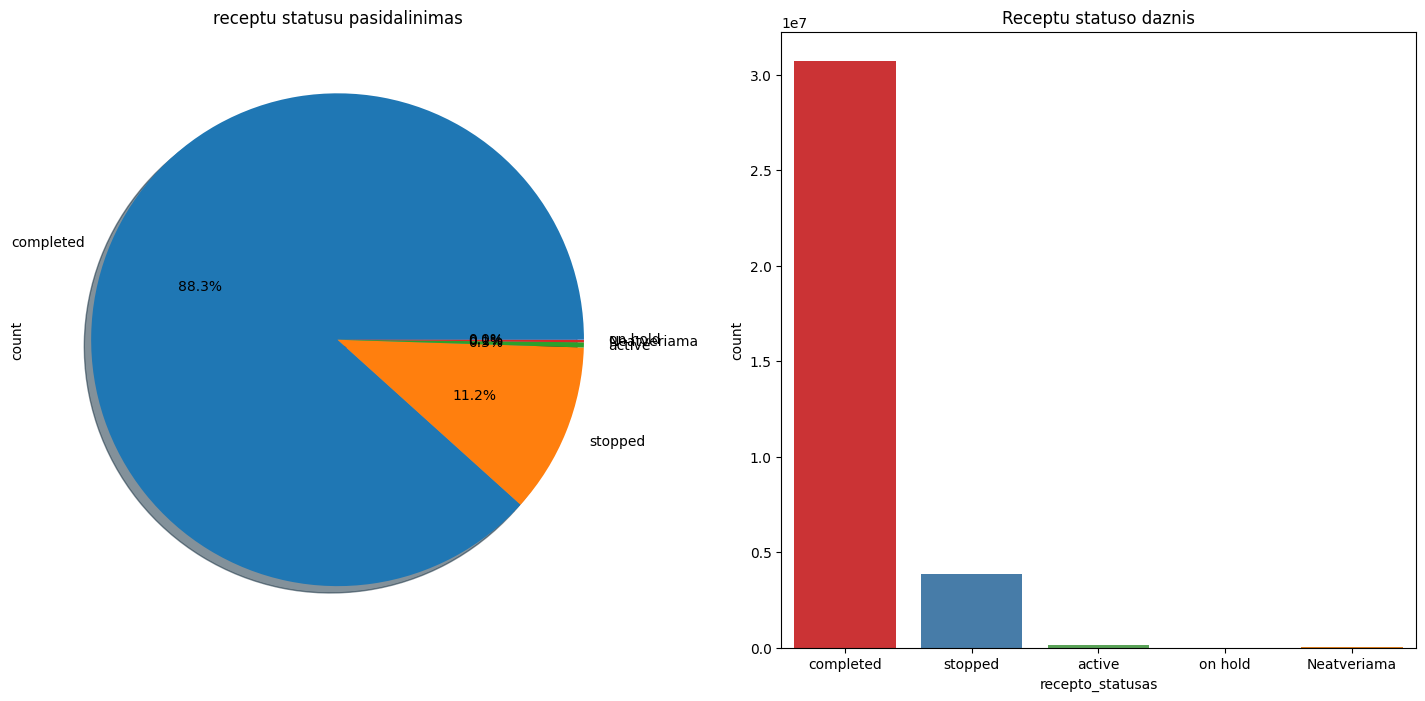

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['recepto_statusas'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('receptu statusu pasidalinimas')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="recepto_statusas", data=df, palette="Set1")
ax[1].set_title("Receptu statuso daznis")

plt.show()

In [16]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

ligos_kodas  contains  10017  labels
ligos_pav  contains  9975  labels
vaisto_tipas  contains  6  labels
vaisto_bendr_pav  contains  2806  labels
vaisto_prek_pav  contains  3768  labels
atc_kodas  contains  1206  labels
atc_pav  contains  1118  labels
vaisto_farmac_forma_pav  contains  368  labels
vaisto_stiprumas  contains  1825  labels
mpp_aprasymas  contains  3505  labels
dozuociu_sk_vnt_pav  contains  82  labels
vart_budas_pav  contains  3  labels
vien_doze_vnt_pav  contains  4  labels
vart_daznumas  contains  4  labels
vart_laikas  contains  6  labels
vaisto_narkot_poz_pav  contains  6  labels
recepto_statusas  contains  5  labels
org_savivaldybe  contains  62  labels
gyd_kvalifikacijos_galioja  contains  150  labels
pac_lytis  contains  4  labels
pac_amziaus_gr  contains  6  labels
pac_savivaldybe  contains  62  labels


In [17]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 15 numerical variables

The numerical variables are :

 ['dirbt_recepto_id', 'recepto_metai', 'recepto_ketv', 'vaisto_farmac_forma_id', 'dozuociu_sk', 'dozuociu_sk_vnt_id', 'vart_budas_id', 'vien_doze', 'vien_doze_vnt_id', 'vart_trukme_d', 'gydymui_testi_periodas_d', 'recepto_galiojimas_d', 'kompens_poz', 'vaisto_narkot_poz_id', 'Unnamed: 0']


In [18]:
df[numerical].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

/Users/justas/PycharmProjects/projektas/venv/lib/python3.10/site-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/justas/PycharmProjects/projektas/venv/lib/python3.10/site-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,dirbt_recepto_id,recepto_metai,recepto_ketv,vaisto_farmac_forma_id,dozuociu_sk,dozuociu_sk_vnt_id,vart_budas_id,vien_doze,vien_doze_vnt_id,vart_trukme_d,gydymui_testi_periodas_d,recepto_galiojimas_d,kompens_poz,vaisto_narkot_poz_id,Unnamed: 0
dirbt_recepto_id,1.0,nan,-0.01203,0.0006705,5.312e-05,-3.528e-05,0.003612,0.00323,0.00323,-0.0002319,0.002533,-0.0001704,2.718e-05,0.001825,nan
recepto_metai,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
recepto_ketv,-0.01203,nan,1.0,-0.01377,-3.74e-05,0.003981,-0.01347,-0.01205,-0.01205,-0.0007656,-0.01086,-0.001916,0.007733,-0.001362,0.02571
vaisto_farmac_forma_id,0.0006705,nan,-0.01377,1.0,0.0002145,0.1404,0.9998,0.9998,0.9998,0.1004,0.5751,0.07752,0.1486,0.963,nan
dozuociu_sk,5.312e-05,nan,-3.74e-05,0.0002145,1.0,0.001349,0.9112,0.9311,0.9307,0.0002958,0.113,0.0001485,0.0004893,0.01514,-0.0002912
dozuociu_sk_vnt_id,-3.528e-05,nan,0.003981,0.1404,0.001349,1.0,1.0,1.0,1.0,0.0528,0.3947,0.002435,0.08461,0.8316,-0.0001053
vart_budas_id,0.003612,nan,-0.01347,0.9998,0.9112,1.0,1.0,1.0,1.0,0.9749,nan,1.0,1.0,nan,nan
vien_doze,0.00323,nan,-0.01205,0.9998,0.9311,1.0,1.0,1.0,1.0,0.9723,nan,1.0,1.0,nan,nan
vien_doze_vnt_id,0.00323,nan,-0.01205,0.9998,0.9307,1.0,1.0,1.0,1.0,0.9721,nan,1.0,1.0,nan,nan
vart_trukme_d,-0.0002319,nan,-0.0007656,0.1004,0.0002958,0.0528,0.9749,0.9723,0.9721,1.0,0.8235,0.2712,0.5313,0.3814,-0.005887


In [19]:
df = df.drop(columns=['dirbt_recepto_id', 'vaisto_prek_pav', 'mpp_aprasymas', 'vart_budas_id', 'vart_budas_pav', 'vien_doze', 
                      'vien_doze_vnt_id', 'vien_doze_vnt_pav', 'vart_daznumas', 'vart_laikas',
                      'gydymui_testi_periodas_d'])

numerical = [var for var in df.columns if df[var].dtype!='O']

df[numerical].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

/Users/justas/PycharmProjects/projektas/venv/lib/python3.10/site-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/justas/PycharmProjects/projektas/venv/lib/python3.10/site-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,recepto_metai,recepto_ketv,vaisto_farmac_forma_id,dozuociu_sk,dozuociu_sk_vnt_id,vart_trukme_d,recepto_galiojimas_d,kompens_poz,vaisto_narkot_poz_id,Unnamed: 0
recepto_metai,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
recepto_ketv,nan,1.0,-0.01377,-3.74e-05,0.003981,-0.0007656,-0.001916,0.007733,-0.001362,0.02571
vaisto_farmac_forma_id,nan,-0.01377,1.0,0.0002145,0.1404,0.1004,0.07752,0.1486,0.963,nan
dozuociu_sk,nan,-3.74e-05,0.0002145,1.0,0.001349,0.0002958,0.0001485,0.0004893,0.01514,-0.0002912
dozuociu_sk_vnt_id,nan,0.003981,0.1404,0.001349,1.0,0.0528,0.002435,0.08461,0.8316,-0.0001053
vart_trukme_d,nan,-0.0007656,0.1004,0.0002958,0.0528,1.0,0.2712,0.5313,0.3814,-0.005887
recepto_galiojimas_d,nan,-0.001916,0.07752,0.0001485,0.002435,0.2712,1.0,0.03092,0.4354,-0.0007618
kompens_poz,nan,0.007733,0.1486,0.0004893,0.08461,0.5313,0.03092,1.0,0.579,-0.00526
vaisto_narkot_poz_id,nan,-0.001362,0.963,0.01514,0.8316,0.3814,0.4354,0.579,1.0,nan
Unnamed: 0,nan,0.02571,nan,-0.0002912,-0.0001053,-0.005887,-0.0007618,-0.00526,nan,1.0


In [20]:
df = df.drop(columns='recepto_metai')

numerical = [var for var in df.columns if df[var].dtype!='O']

df[numerical].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,recepto_ketv,vaisto_farmac_forma_id,dozuociu_sk,dozuociu_sk_vnt_id,vart_trukme_d,recepto_galiojimas_d,kompens_poz,vaisto_narkot_poz_id,Unnamed: 0
recepto_ketv,1.0,-0.01377,-3.74e-05,0.003981,-0.0007656,-0.001916,0.007733,-0.001362,0.02571
vaisto_farmac_forma_id,-0.01377,1.0,0.0002145,0.1404,0.1004,0.07752,0.1486,0.963,nan
dozuociu_sk,-3.74e-05,0.0002145,1.0,0.001349,0.0002958,0.0001485,0.0004893,0.01514,-0.0002912
dozuociu_sk_vnt_id,0.003981,0.1404,0.001349,1.0,0.0528,0.002435,0.08461,0.8316,-0.0001053
vart_trukme_d,-0.0007656,0.1004,0.0002958,0.0528,1.0,0.2712,0.5313,0.3814,-0.005887
recepto_galiojimas_d,-0.001916,0.07752,0.0001485,0.002435,0.2712,1.0,0.03092,0.4354,-0.0007618
kompens_poz,0.007733,0.1486,0.0004893,0.08461,0.5313,0.03092,1.0,0.579,-0.00526
vaisto_narkot_poz_id,-0.001362,0.963,0.01514,0.8316,0.3814,0.4354,0.579,1.0,nan
Unnamed: 0,0.02571,nan,-0.0002912,-0.0001053,-0.005887,-0.0007618,-0.00526,nan,1.0


In [21]:
df = df.drop(columns='vaisto_narkot_poz_id')

numerical = [var for var in df.columns if df[var].dtype!='O']

df[numerical].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,recepto_ketv,vaisto_farmac_forma_id,dozuociu_sk,dozuociu_sk_vnt_id,vart_trukme_d,recepto_galiojimas_d,kompens_poz,Unnamed: 0
recepto_ketv,1.0,-0.01377,-3.74e-05,0.003981,-0.0007656,-0.001916,0.007733,0.02571
vaisto_farmac_forma_id,-0.01377,1.0,0.0002145,0.1404,0.1004,0.07752,0.1486,nan
dozuociu_sk,-3.74e-05,0.0002145,1.0,0.001349,0.0002958,0.0001485,0.0004893,-0.0002912
dozuociu_sk_vnt_id,0.003981,0.1404,0.001349,1.0,0.0528,0.002435,0.08461,-0.0001053
vart_trukme_d,-0.0007656,0.1004,0.0002958,0.0528,1.0,0.2712,0.5313,-0.005887
recepto_galiojimas_d,-0.001916,0.07752,0.0001485,0.002435,0.2712,1.0,0.03092,-0.0007618
kompens_poz,0.007733,0.1486,0.0004893,0.08461,0.5313,0.03092,1.0,-0.00526
Unnamed: 0,0.02571,nan,-0.0002912,-0.0001053,-0.005887,-0.0007618,-0.00526,1.0


In [22]:
small_var = ['Neatveriama', 'active', 'on hold']
df = df[df.vaisto_tipas != 'Neatveriama']
df = df[df.recepto_statusas != 'active']
df = df[df.recepto_statusas != 'on hold']

In [23]:
df = df.groupby('ligos_pav').filter(lambda x : len(x)>10)
df = df.groupby('gyd_kvalifikacijos_galioja').filter(lambda x : len(x)>5)
df = df.drop(columns='vaisto_tipas')


In [24]:
df.isnull().sum()

recepto_ketv                         0
ligos_kodas                   16326741
ligos_pav                            0
vaisto_bendr_pav                 19860
atc_kodas                     17074722
atc_pav                       17074722
vaisto_farmac_forma_id        17015925
vaisto_farmac_forma_pav         689186
vaisto_stiprumas              17026561
dozuociu_sk                          0
dozuociu_sk_vnt_id                  11
dozuociu_sk_vnt_pav                 11
vart_trukme_d                        0
recepto_galiojimas_d                 0
kompens_poz                          0
vaisto_narkot_poz_pav         32538774
recepto_statusas                     0
org_savivaldybe               32224655
gyd_kvalifikacijos_galioja           0
pac_lytis                        87643
pac_amziaus_gr                   87643
pac_savivaldybe                 960574
Unnamed: 0                    17794774
dtype: int64

In [25]:
df = df.drop(columns='vaisto_narkot_poz_pav')


In [26]:
df.pac_savivaldybe.fillna(df.org_savivaldybe, inplace=True)
df = df.drop(columns='org_savivaldybe')
df = df.drop(columns=['ligos_kodas', 'vaisto_stiprumas', 'atc_kodas', 'atc_pav', 'vaisto_farmac_forma_id',
                      'vaisto_stiprumas'])
                      

In [27]:
df.isnull().sum()

recepto_ketv                         0
ligos_pav                            0
vaisto_bendr_pav                 19860
vaisto_farmac_forma_pav         689186
dozuociu_sk                          0
dozuociu_sk_vnt_id                  11
dozuociu_sk_vnt_pav                 11
vart_trukme_d                        0
recepto_galiojimas_d                 0
kompens_poz                          0
recepto_statusas                     0
gyd_kvalifikacijos_galioja           0
pac_lytis                        87643
pac_amziaus_gr                   87643
pac_savivaldybe                 827728
Unnamed: 0                    17794774
dtype: int64

In [28]:
df = df.dropna()

In [29]:
df['recepto_statusas'].value_counts()

recepto_statusas
completed    14501933
stopped       1824808
Name: count, dtype: int64

In [30]:
df.to_csv('data/isvalytas.csv')